In [17]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split

In [144]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list

pima_df = pd.read_csv("pima-indians-diabetes.csv",skiprows=2, names= colnames)

In [145]:
pima_df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [146]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function columnwise
# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [147]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,767.0,3.842243,3.370877,0.000,1.0000,3.000,6.000,17.00
plas,767.0,120.859192,31.978468,0.000,99.0000,117.000,140.000,199.00
pres,767.0,69.101695,19.368155,0.000,62.0000,72.000,80.000,122.00
skin,767.0,20.517601,15.954059,0.000,0.0000,23.000,32.000,99.00
test,767.0,79.903520,115.283105,0.000,0.0000,32.000,127.500,846.00
mass,767.0,31.990482,7.889091,0.000,27.3000,32.000,36.600,67.10
pedi,767.0,0.471674,0.331497,0.078,0.2435,0.371,0.625,2.42
age,767.0,33.219035,11.752296,21.000,24.0000,29.000,41.000,81.00
class,767.0,0.348110,0.476682,0.000,0.0000,0.000,1.000,1.00


In [148]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,267,267,267,267,267,267,267,267


In [149]:
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
5,3,78,50,32,88,31.0,0.248,26,1
6,10,115,0,0,0,35.3,0.134,29,0
7,2,197,70,45,543,30.5,0.158,53,1
8,8,125,96,0,0,0.0,0.232,54,1
9,4,110,92,0,0,37.6,0.191,30,0


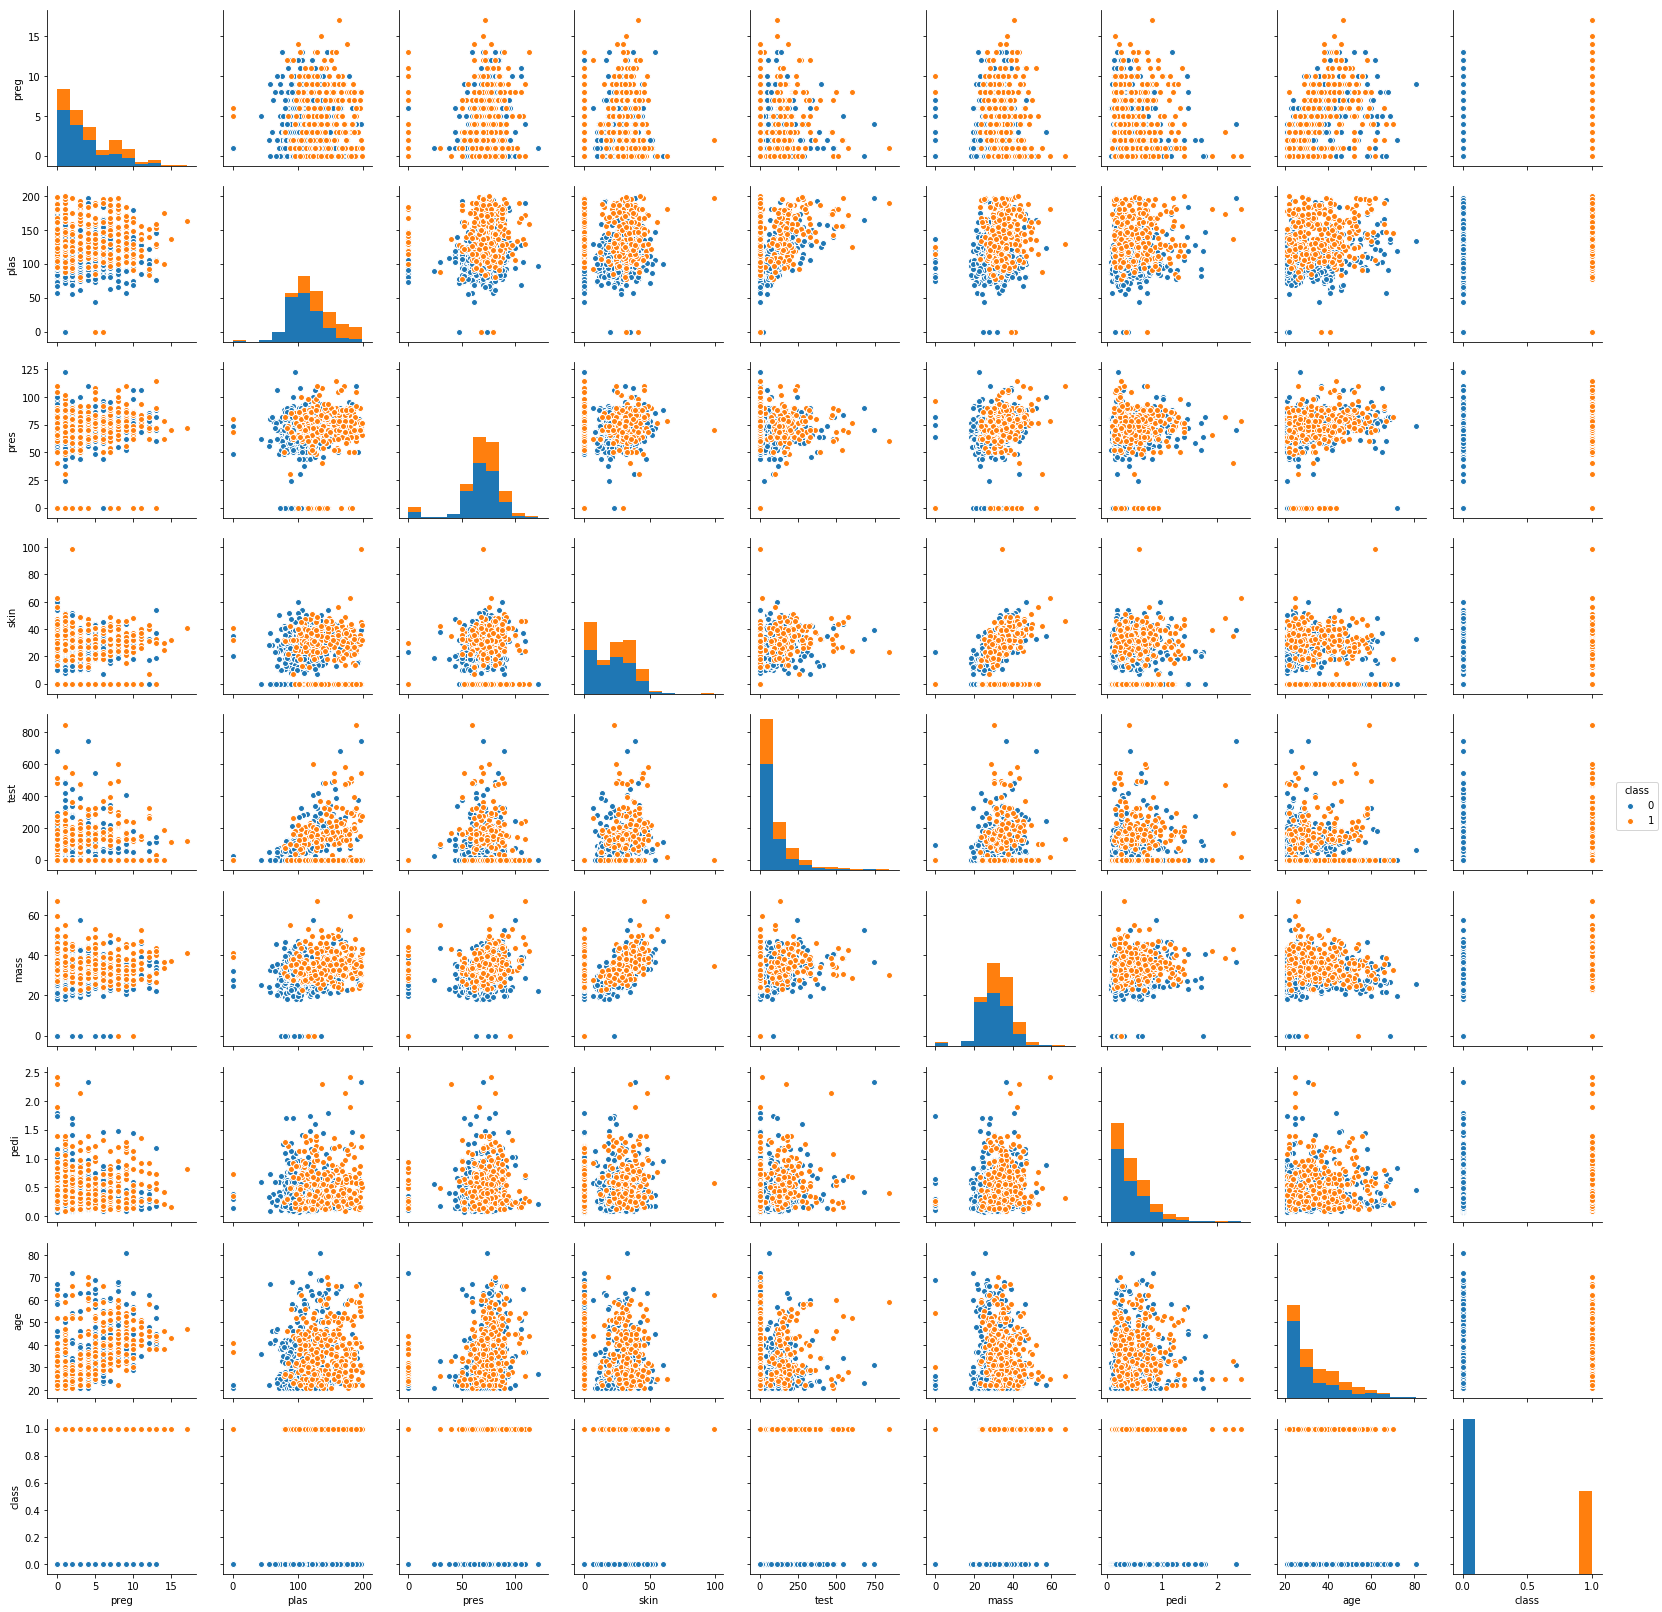

In [150]:
# Pairplot using s

sns.pairplot(pima_df, hue='class')

In [151]:
#data for all the attributes are skewed, especially for the variable "test"

#The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right


In [152]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [153]:
from scipy.stats import zscore


numeric_cols = pima_df.drop('class', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
class_values = pd.DataFrame(pima_df[['class']])

numeric_cols = numeric_cols.apply(zscore)
pima_df_z = numeric_cols.join(class_values)   # Recreating mpg_df by combining numerical columns with car names

pima_df_z.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,-0.843726,-1.122086,-0.160249,0.532023,-0.693559,-0.683729,-0.364265,-0.188940,0
1,1.234240,1.944476,-0.263578,-1.286882,-0.693559,-1.102301,0.604701,-0.103795,1
2,-0.843726,-0.996920,-0.160249,0.155698,0.122357,-0.493469,-0.919684,-1.040393,0
3,-1.140579,0.505069,-1.503534,0.908349,0.764674,1.409132,5.482732,-0.018650,1
4,0.343683,-0.152051,0.253070,-1.286882,-0.693559,-0.810569,-0.817052,-0.274086,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BCA8D5B38>,
      dtype=object)

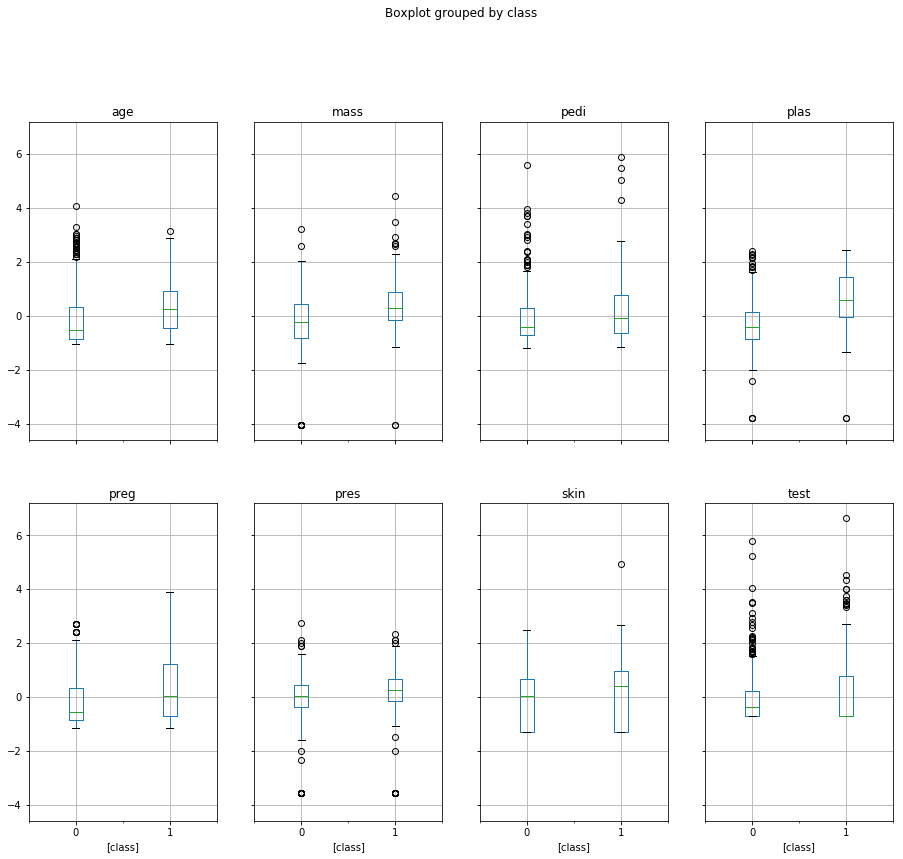

In [154]:
import matplotlib.pylab as plt

pima_df_z.boxplot(by = 'class',  layout=(3,4), figsize=(15, 20))

#print(pima_df.boxplot('preg'))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDE340A58>]],
      dtype=object)

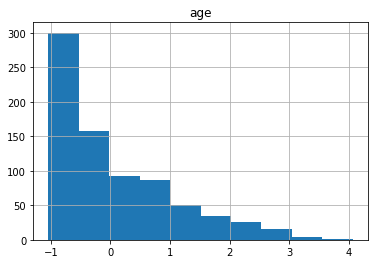

In [155]:
pima_df_z.hist('age')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDE6AE7F0>]],
      dtype=object)

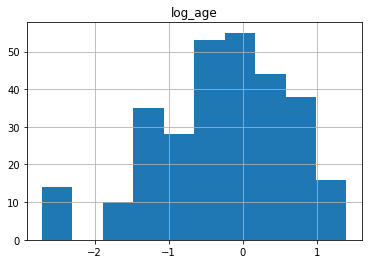

In [156]:
pima_df_z["log_age"] = np.log(pima_df_z['age'])
pima_df_z["log_test"] = np.log(pima_df_z["test"])
pima_df_z["log_preg"] = np.log(pima_df_z["preg"])
pima_df_z.hist('log_age')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDBD5EDA0>]],
      dtype=object)

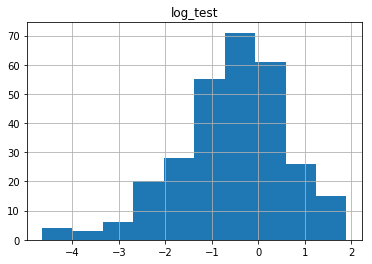

In [157]:
pima_df_z.hist("log_test")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BDDD26E48>]],
      dtype=object)

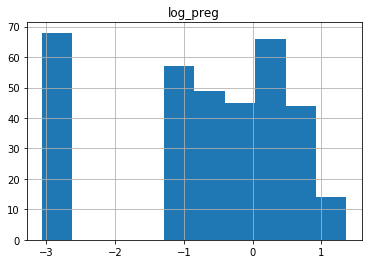

In [158]:
pima_df_z.hist("log_preg")

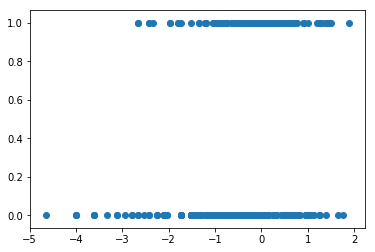

In [159]:
plt.scatter(pima_df_z['log_test'] , pima_df_z["class"])

#Conclusion -

#1. Too many outliers on each dimensions indicated by long tails with gaps
#2. data no normally distributed n the dimensions. 
#3. log2 transformation of exponential distributed data results near normal distribution

#4. None of the given attributes are able to distinguishe the two classes. The distribution of the two classes eclipse each
#other on all dimensions
#5. Expect poor performance
